In [5]:
import quantumpropagator as qp
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import sys
import glob
import pandas as pd
import numpy as np

%matplotlib inline

plt.rcParams.update({'font.size': 12})

### Getting data from Francoise folder

In [6]:
root = '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019'
manu_root = '/home/alessio/u-3dPropagation_manuscript/Report/images'
# 'steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total', 'Total Deviation', 
# 'Xpulse', 'Ypulse', 'Zpulse', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'Time AU', 
# 'Non-decided', 'Reactants', 'Products', 
# 'P(t) Tot', 'P(t) S0', 'P(t) S1', 'P(t) S2', 'P(t) S3', 'P(t) S4', 'P(t) S5', 'P(t) S6', 'P(t) S7'

### Positions

In [7]:
pos_folder = os.path.join(root, 'positions')
all_files_abs = [ os.path.join(pos_folder, x) for x in sorted(os.listdir(pos_folder))]
all_dfs = [pd.read_csv(x, index_col=0) for x in all_files_abs]

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

NameError: name 'all_dfs' is not defined

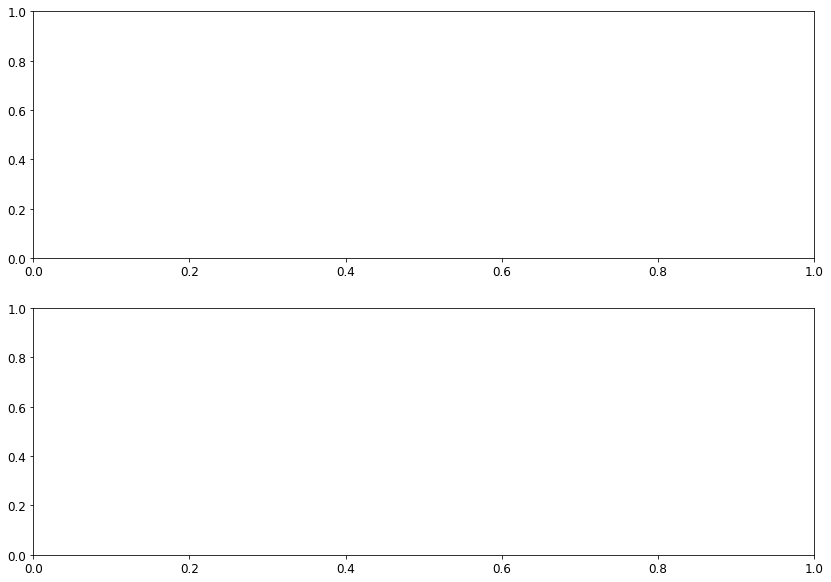

In [8]:
from matplotlib.lines import Line2D
positionpopulation_out = os.path.join(manu_root,'positionpopulation.png')

fig, [ax0,ax1] = plt.subplots(2,1,figsize = (14,10))
time = all_dfs[0]['fs']

labels = ['Pos1','Pos2','Pos3','Pos4','Pos5']
colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'mediumpurple']

for i, run in enumerate(all_dfs):
    lab = '{}'.format(labels[i])
    ax0.plot(time, run['S0'] + run['P(t) S0'], color = colors[i], label=lab)
    ax0.plot(time, run['S1'], color = colors[i])
    
    
    ax1.plot(time, run['Reactants'],color = colors[i], ls = ':')
    ax1.plot(time, run['Products'] + run['P(t) S0'],color = colors[i],)

ax0.set_ylabel(r'Fraction of Population')
ax1.set_ylabel(r'Fraction of $S_0$')
ax1.set_xlabel('fs')
ax0.legend()
ax0.set_title(r'$S_1$ and $S_0$ population')
ax1.set_title(r'Reactants and products')

custom_lines = [Line2D([0], [0], color='k', ls=':'), Line2D([0], [0], color='k')]
ax1.legend(custom_lines,['Reactants','Products'])
                                                            
fig.tight_layout()
fig.savefig(positionpopulation_out)

# Figures for the different runs

In [9]:
folders = ['FC', 'IR_INV', 'IR_LON', 'IR_NOR', 'UV', '2-3']
all_files_abs = [ os.path.join(os.path.join(root,x),x)+'.txt' for x in folders ]
print(all_files_abs)
all_dfs = [pd.read_csv(x, index_col=0) for x in all_files_abs ]
print(all_dfs[0].keys())

['/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/FC/FC.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_INV/IR_INV.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_LON/IR_LON.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/IR_NOR/IR_NOR.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/UV/UV.txt', '/STORE/alessio/things/dox/Alessio-Francoise/Results_MD_October2019/2-3/2-3.txt']
Index(['steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total',
       'Total Deviation', 'Xpulse', 'Ypulse', 'Zpulse', 'S0', 'S1', 'S2', 'S3',
       'S4', 'S5', 'S6', 'S7', 'Time AU', 'Non-decided', 'Reactants',
       'Products', 'P(t) Tot', 'P(t) S0', 'P(t) S1', 'P(t) S2', 'P(t) S3',
       'P(t) S4', 'P(t) S5', 'P(t) S6', 'P(t) S7'],
      dtype='object')


/home/alessio/u-3dPropagation_manuscript/Report/images/graph-FC.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-INV.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-LON.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-IR-NOR.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-UV.png
/home/alessio/u-3dPropagation_manuscript/Report/images/graph-2-3.png


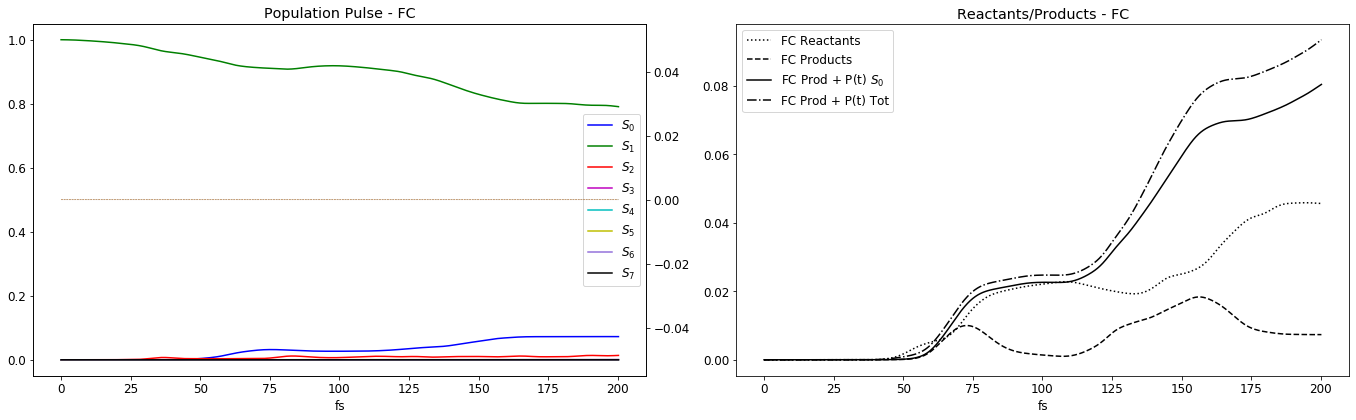

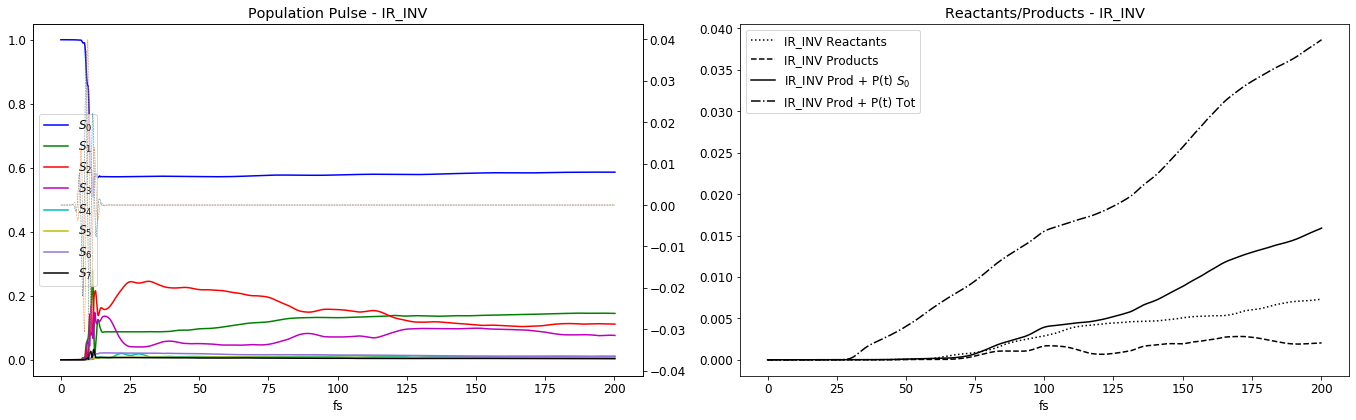

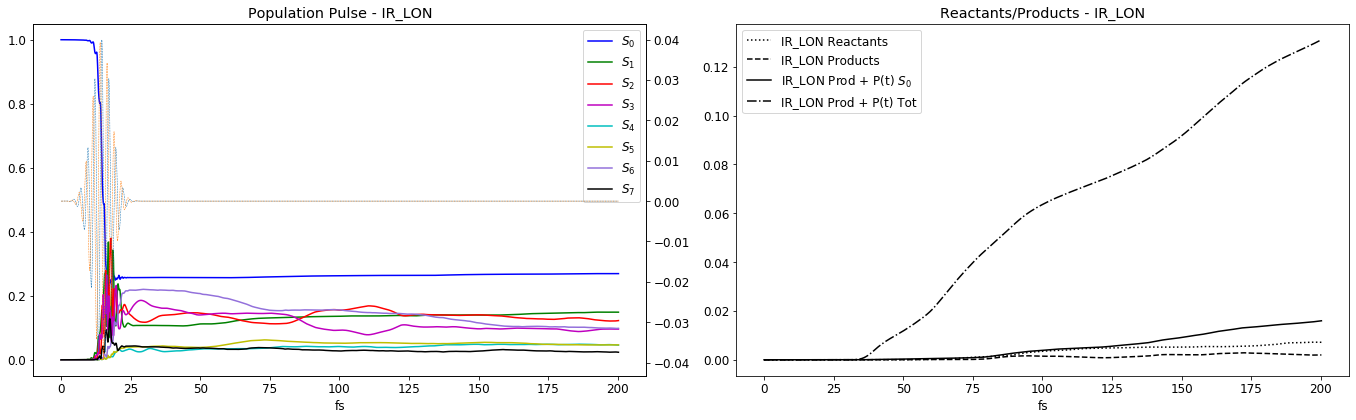

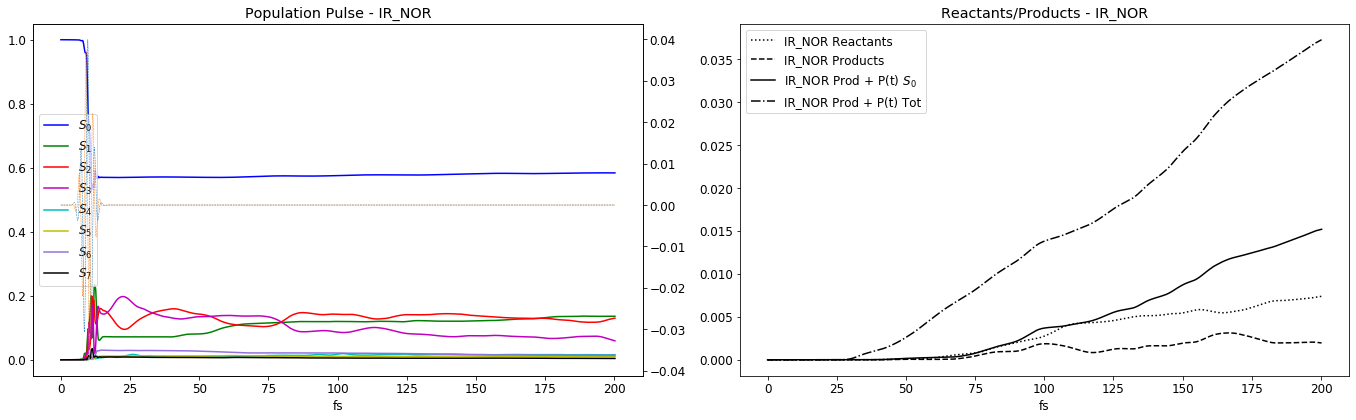

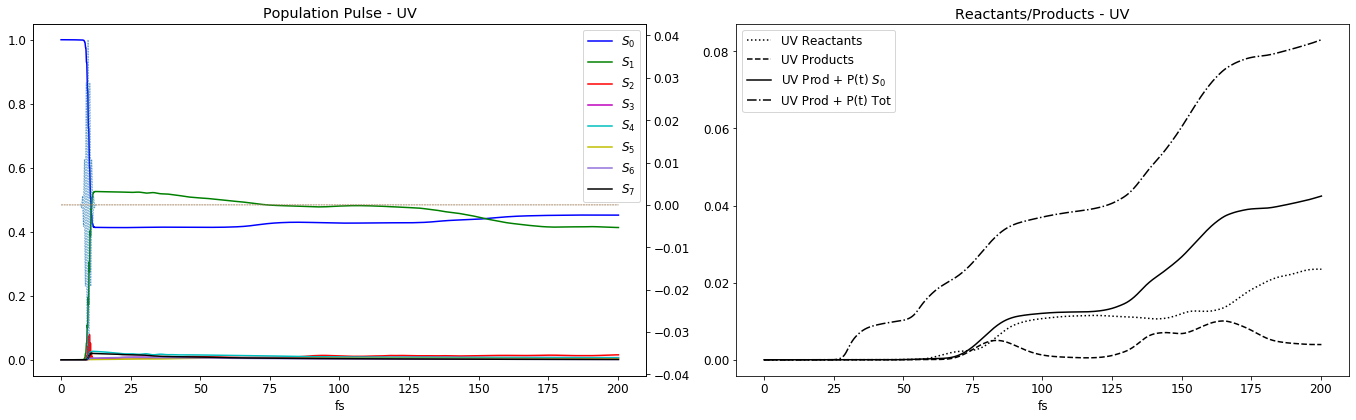

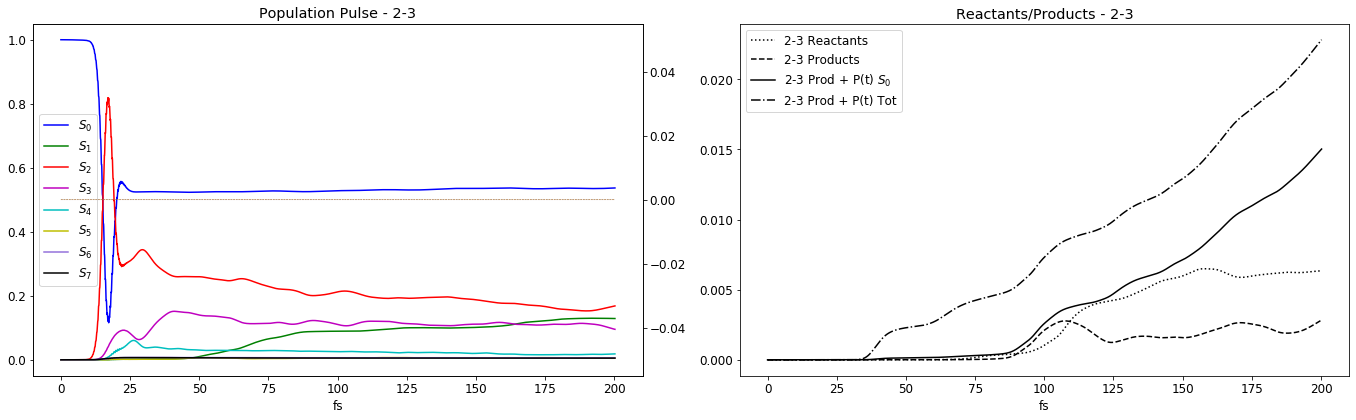

In [10]:
for jjj in range(len(folders)):

    this_df = all_dfs[jjj]

    fig, [ax0, ax1] = plt.subplots(1,2,figsize=(19,6))

    colors = ['b', 'g', 'r', 'm', 'c', 'y', 'mediumpurple', 'k']

    labelz = folders[jjj]

    for ind in range(8):
        kkey = 'S{}'.format(ind)
        true_label = r'$S_{}$'.format(ind)
        ax0.plot(this_df['fs'], this_df[kkey], label=true_label, color=colors[ind])

    ax00 = ax0.twinx()
    ax00.plot(this_df['fs'], this_df['Xpulse'], label='X_pulse', ls='--', lw=.5)
    ax00.plot(this_df['fs'], this_df['Ypulse'], label='Y_pulse', ls='--', lw=.5)
    ax0.set_title('Population Pulse - {}'.format(labelz))
    #ax0.set_xlim(0,50)
    ax0.set_xlabel('fs')
    ax0.legend()
    
    ax1.plot(this_df['fs'],  this_df['Reactants']   , label='{} Reactants'.format(labelz),ls = ':', color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products']    , label='{} Products'.format(labelz) , ls='--',  color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products'] + this_df['P(t) S0'], label=r'{} Prod + P(t) $S_0$'.format(labelz), color=colors[ind])
    ax1.plot(this_df['fs'],  this_df['Products'] + this_df['P(t) Tot'], label=r'{} Prod + P(t) Tot'.format(labelz), ls = '-.',  color=colors[ind])
    ax1.set_title('Reactants/Products - {}'.format(labelz))
    ax1.set_xlabel('fs')
    ax1.legend()

    fig.tight_layout()
    output_name = os.path.join(manu_root,'graph-{}.png'.format(labelz.replace('_','-')))
    print(output_name)
    fig.savefig(output_name)